In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def get_histogram(arr):
    """Bu metot array olarak verilen resmin histogramını çıkarır"""
    hist = [0] * 256

    for val in arr:
        hist[val] += 1

    return hist


In [12]:
def cumulative_distribution(hist):
    """Bu metot histogramı verilen resmin kümülatif dağılımını verir"""

    # cdf i tutacak array
    arr = [0] * 256
    # toplam piksel sayısı
    s = sum(hist)
    # histogram için kümülatif olarak artacak değer
    c = hist[0]
    arr[0] = c / s

    for i in range(1, 256):
        c += hist[i-1]
        arr[i] = c / s

    return arr


In [13]:
def get_equalized_channel(cdf, channel):
    """Bu metot verilen resmi cdf ine göre channelı eşitler"""
    newChannel = []

    for row in channel:
        newRow = []
        for pixel in row:
            newRow.append(int(cdf[pixel] * 255 / cdf[-1]))
        newChannel.append(newRow)

    return newChannel


In [14]:
def plot_hist(hist):
    """Bu metot histogramı çizdirir"""
    plt.bar(range(256), hist)
    plt.xlabel("Pixel Value")
    plt.ylabel("Count")
    plt.title("Histogram")
    plt.show()


In [15]:
def plot_cdf(cdf):
    """Bu metot kümülatif dağılımını çizdirir"""
    plt.plot(cdf, color="b")
    plt.xlabel("Pixel Value")
    plt.ylabel("Cumulative Probability Density")
    plt.title("CDF")
    plt.show()


In [23]:
def histogram_equalization(filename, image_type):
    """Bu metot histogram eşitleme işlemini yapar"""
    image = cv2.imread(filename, image_type)
    dot_index = filename.find('.')
    channels = cv2.split(image)
    equalized_channels = []

    for channel in channels:
        hist = get_histogram(channel.flatten())
        plot_hist(hist)
        cdf = cumulative_distribution(hist)
        plot_cdf(cdf)
        equalized_channels.append(np.asarray(get_equalized_channel(cdf, channel)))

    equalized = cv2.merge(equalized_channels)
    cv2.imwrite(filename[:dot_index] + "HistogramEqualized.jpg"
                , equalized)
    
    image = cv2.imread(filename[:dot_index] + "HistogramEqualized.jpg", image_type)
    channels = cv2.split(image)
    
    for channel in channels:
        hist = get_histogram(channel.flatten())
        plot_hist(hist)


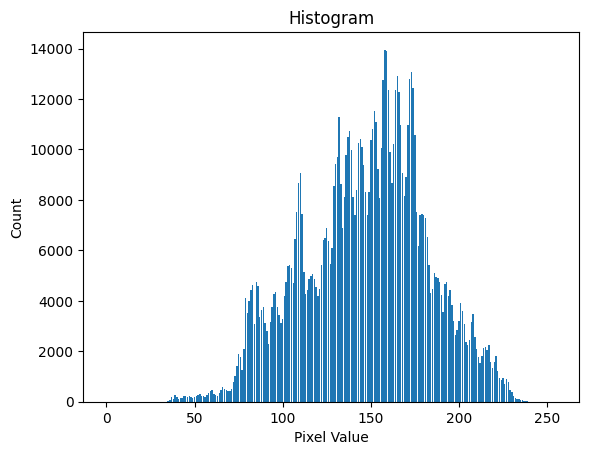

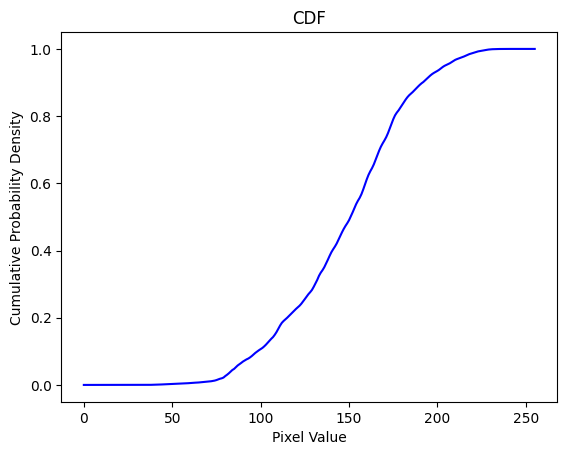

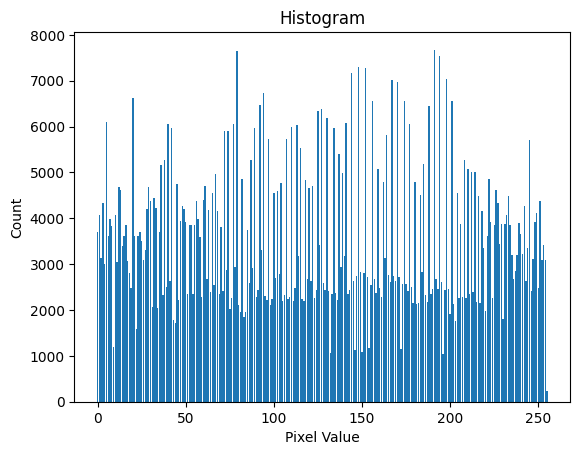

In [24]:
histogram_equalization("GrayImage.jpeg", cv2.IMREAD_GRAYSCALE)

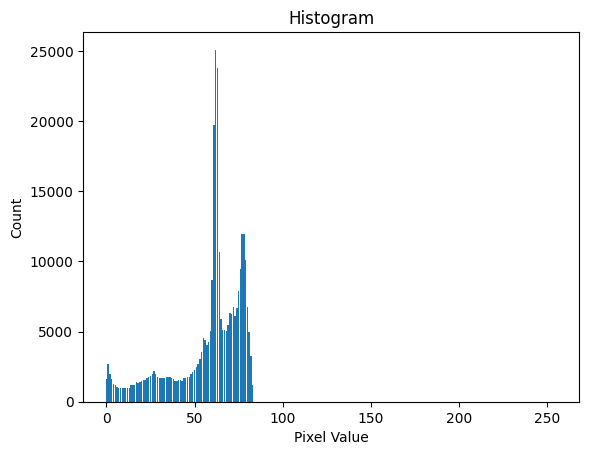

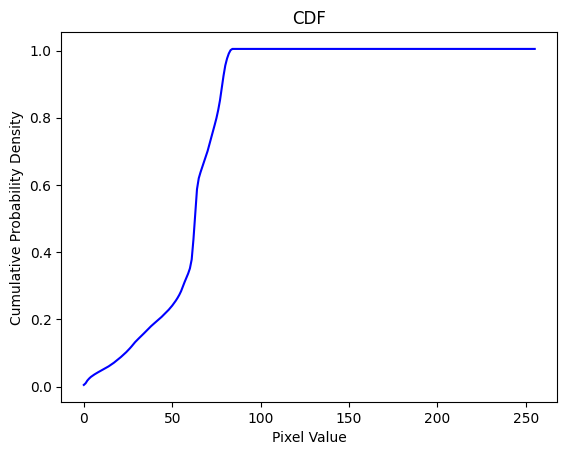

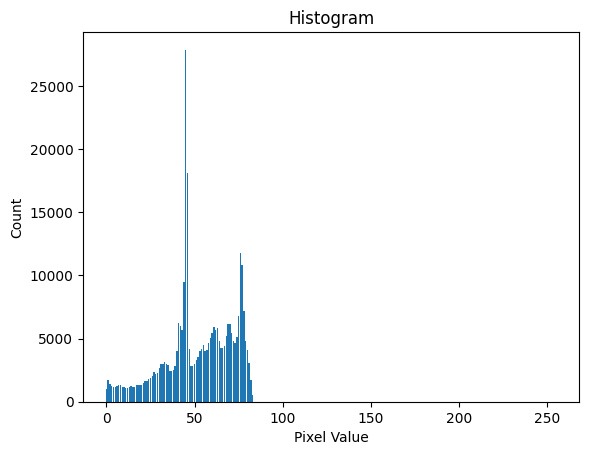

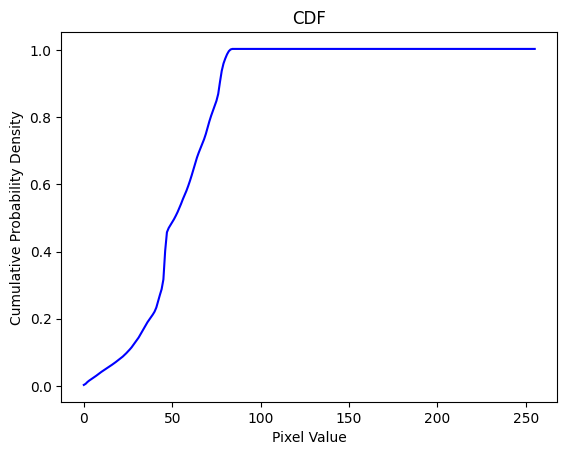

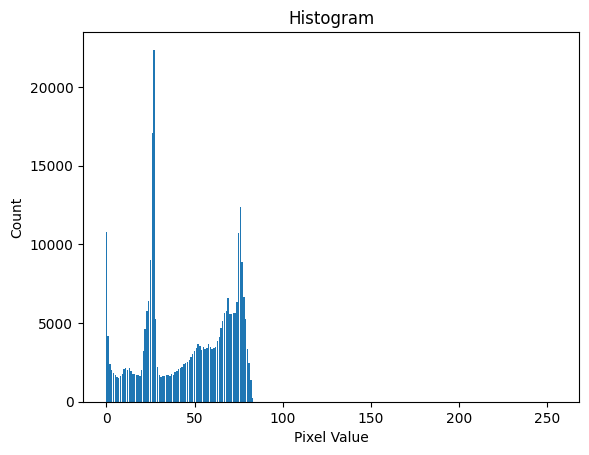

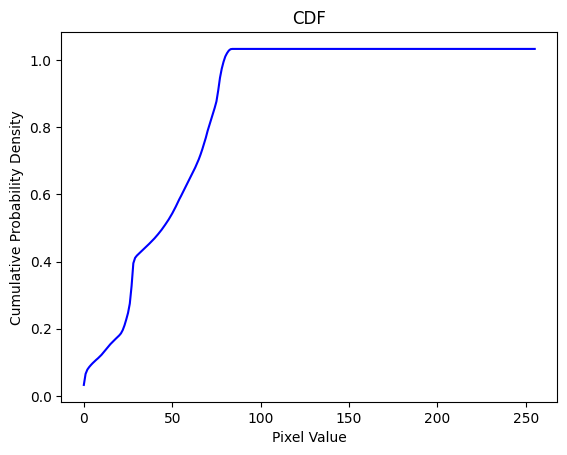

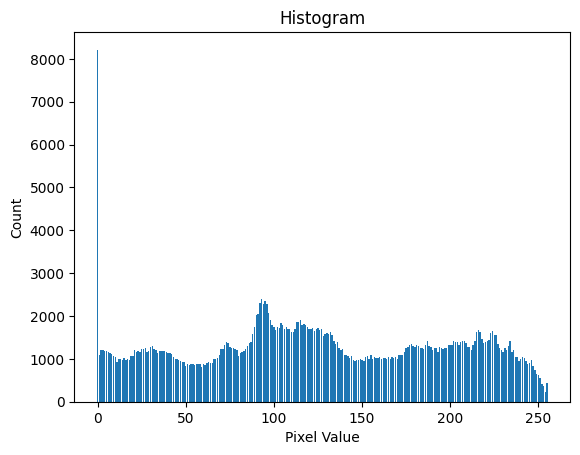

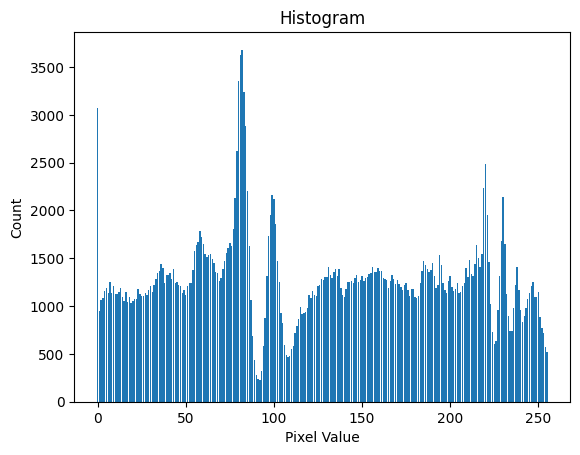

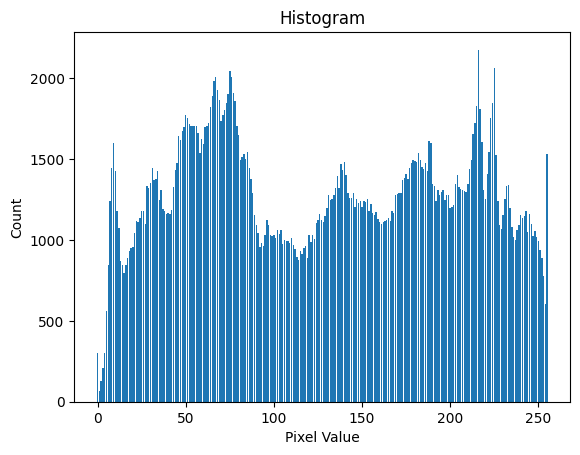

In [25]:
histogram_equalization("ColorImage.tif", cv2.IMREAD_COLOR)